I just found out that the negative value in df.corr means that it has inverted impact with the "labels".
so if the correlation value is very small (big negative number), it means that the feature have big impact on the labels.

So today I'm going to reduce some features with small impact, but in the correct way XD

In [460]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hands-on-machine-learning-housing-dataset/housing.csv


In [461]:
df = pd.read_csv("/kaggle/input/hands-on-machine-learning-housing-dataset/housing.csv")

There's only ONE string feature

In [462]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [463]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [464]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(0)

Let's change the string feature into integer (representing its class)

In [465]:
col = df["ocean_proximity"]
op = list(set(col))
col = [op.index(x) for x in col]
df["ocean_proximity"] = col

In [466]:
op

['ISLAND', 'NEAR BAY', 'INLAND', 'NEAR OCEAN', '<1H OCEAN']

In [467]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [468]:
X = df.drop(["median_house_value"], axis=1)
Y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,Y)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6268966291818538

Today I'm also trying to normalize data

In [469]:
from sklearn import preprocessing
col_names = X.columns
x = X.values #returns a numpy array
x_scaled = preprocessing.scale(x)
# x_scaled = preprocessing.MinMaxScaler().fit_transform(x_scaled)
X = pd.DataFrame(x_scaled, columns=col_names)

y = Y.values #returns a numpy array
y_scaled = preprocessing.scale(y)
# x_scaled = preprocessing.MinMaxScaler().fit_transform(x_scaled)
Y = pd.DataFrame(y_scaled)



In [470]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.954593,-0.974429,-0.977033,2.344766,-1.739364
1,-1.322844,1.043185,-0.607019,2.045890,1.356913,0.861439,1.669961,2.332238,-1.739364
2,-1.332827,1.038503,1.856182,-0.535746,-0.810272,-0.820777,-0.843637,1.782699,-1.739364
3,-1.337818,1.038503,1.856182,-0.624215,-0.703806,-0.766028,-0.733781,0.932968,-1.739364
4,-1.337818,1.038503,1.856182,-0.462404,-0.597339,-0.759847,-0.629157,-0.012881,-1.739364
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.374942,-0.512592,-0.443449,-1.216128,-0.825168
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.904909,-0.944405,-1.008420,-0.691593,-0.825168
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.112325,-0.369537,-0.174042,-1.142593,-0.825168
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.292135,-0.604429,-0.393753,-1.054583,-0.825168


Let's plot all features with the labels using distplot. by doing so, we can visualize the distribution of the features and visually inspecting whether the features has big correlation with labels or not.

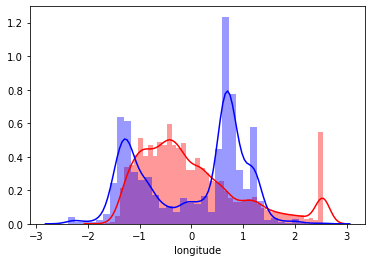

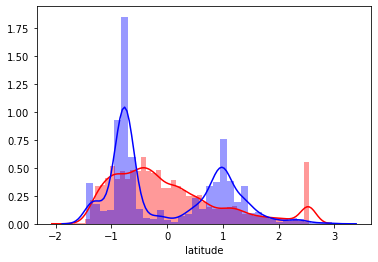

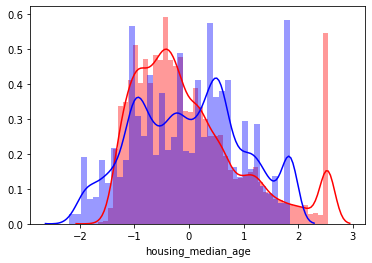

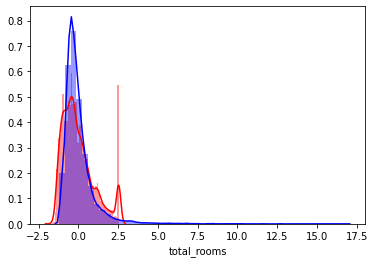

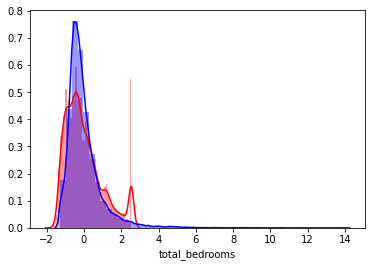

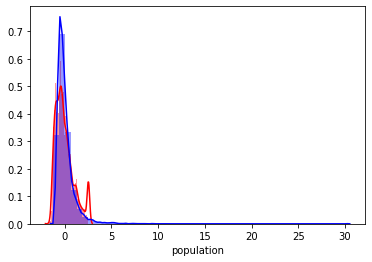

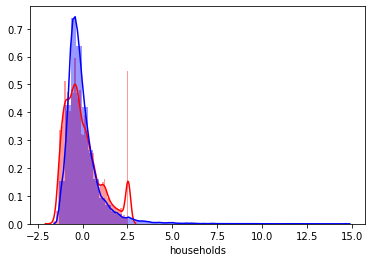

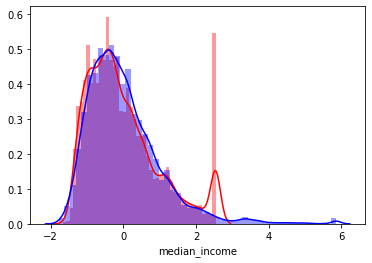

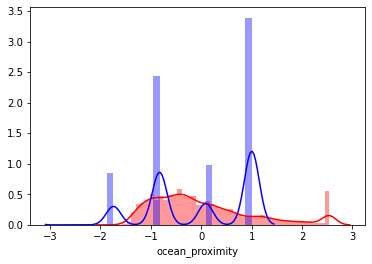

In [471]:
for col in df.columns:
    if col == "median_house_value":
        continue
    sns.distplot(Y, label = "mhv", color="r")
    sns.distplot(X[col], label = col, color="b")
    plt.show()
    

Let's try throw this dataframe to LR first

In [472]:
X = df.drop(["median_house_value"], axis=1)
Y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,Y)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.623012909266718

I'm dropping the features that seems "visually bad"

In [473]:
df = df.drop(["longitude", "latitude", "ocean_proximity"], axis=1)

In [474]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Let's run the LR again

In [475]:

X = df.drop(["median_house_value"], axis=1)
Y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,Y)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.59155805011888

****Conclusion****
Normalizing data surprisingly decrease the model performance for this problem, maybe I did some mistakes when implementing it.
And since I only drop the feature that visually looks like have no correlation with the labels, the performance didn't face a significant drop, even tough it still dropped XD

There are still a lot of things to explore, I have to do better tomorrow
